# OLS summary

In [2]:
df = pd.read_csv("raw_data_4.csv")

In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
df.head(2)

,id,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,vin,drive,type,paint_color,state
0,7034441763,17899,2012.0,volkswagen,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,hatchback,black,ut
1,7034278551,4600,2008.0,honda,4 cylinders,gas,110982.0,clean,automatic,2HGFA16528H503005,fwd,sedan,grey,ut


In [7]:
dfX = pd.DataFrame(df, columns=["id", "year", "manufacturer", "cylinders", "fuel", "odometer", "title_status", "transmission", "vin", "drive", "type", "paint_color", "state"])
dfy = pd.DataFrame(df, columns=["price"])
car_df = pd.concat([dfX, dfy], axis=1)

In [9]:
car_df.head(2)

,id,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,vin,drive,type,paint_color,state,price
0,7034441763,2012.0,volkswagen,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,hatchback,black,ut,17899
1,7034278551,2008.0,honda,4 cylinders,gas,110982.0,clean,automatic,2HGFA16528H503005,fwd,sedan,grey,ut,4600


# 전체 데이터의 회귀분석

In [26]:
model_car = sm.OLS.from_formula("price ~ +id +year +manufacturer +cylinders +fuel +odometer +title_status +transmission +drive +type +paint_color", data=car_df)
result_car = model_car.fit()
print(result_car.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     795.8
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:22:44   Log-Likelihood:            -7.4487e+05
No. Observations:               71454   AIC:                         1.490e+06
Df Residuals:                   71366   BIC:                         1.491e+06
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### 종속변수와 실수형 독립변수의 회귀분석
- 조건수가 크다.
- 스케일링 필요

In [46]:
model_car2 = sm.OLS.from_formula("price ~ +year +odometer", data=car_df)
result_car2 = model_car2.fit()
print(result_car2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                 1.127e+04
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:44:51   Log-Likelihood:            -7.5930e+05
No. Observations:               71454   AIC:                         1.519e+06
Df Residuals:                   71451   BIC:                         1.519e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -7.13e+05   1.21e+04    -58.977      0.0

### 실수형 독립변수의 스케일링과 회귀분석
- 조건수가 작아졌다.

In [43]:
float_columns = ['year', 'odometer']

feature_names = float_columns
feature_names

feature_names = ["scale({})".format(name) for name in feature_names]
feature_names

['scale(year)', 'scale(odometer)']

In [44]:
model_car3 = sm.OLS.from_formula("price ~ " + "+".join(feature_names), data=car_df)
result_car3 = model_car3.fit()
print(result_car3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                 1.127e+04
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:41:36   Log-Likelihood:            -7.5930e+05
No. Observations:               71454   AIC:                         1.519e+06
Df Residuals:                   71451   BIC:                         1.519e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.349e+04     37.306    3

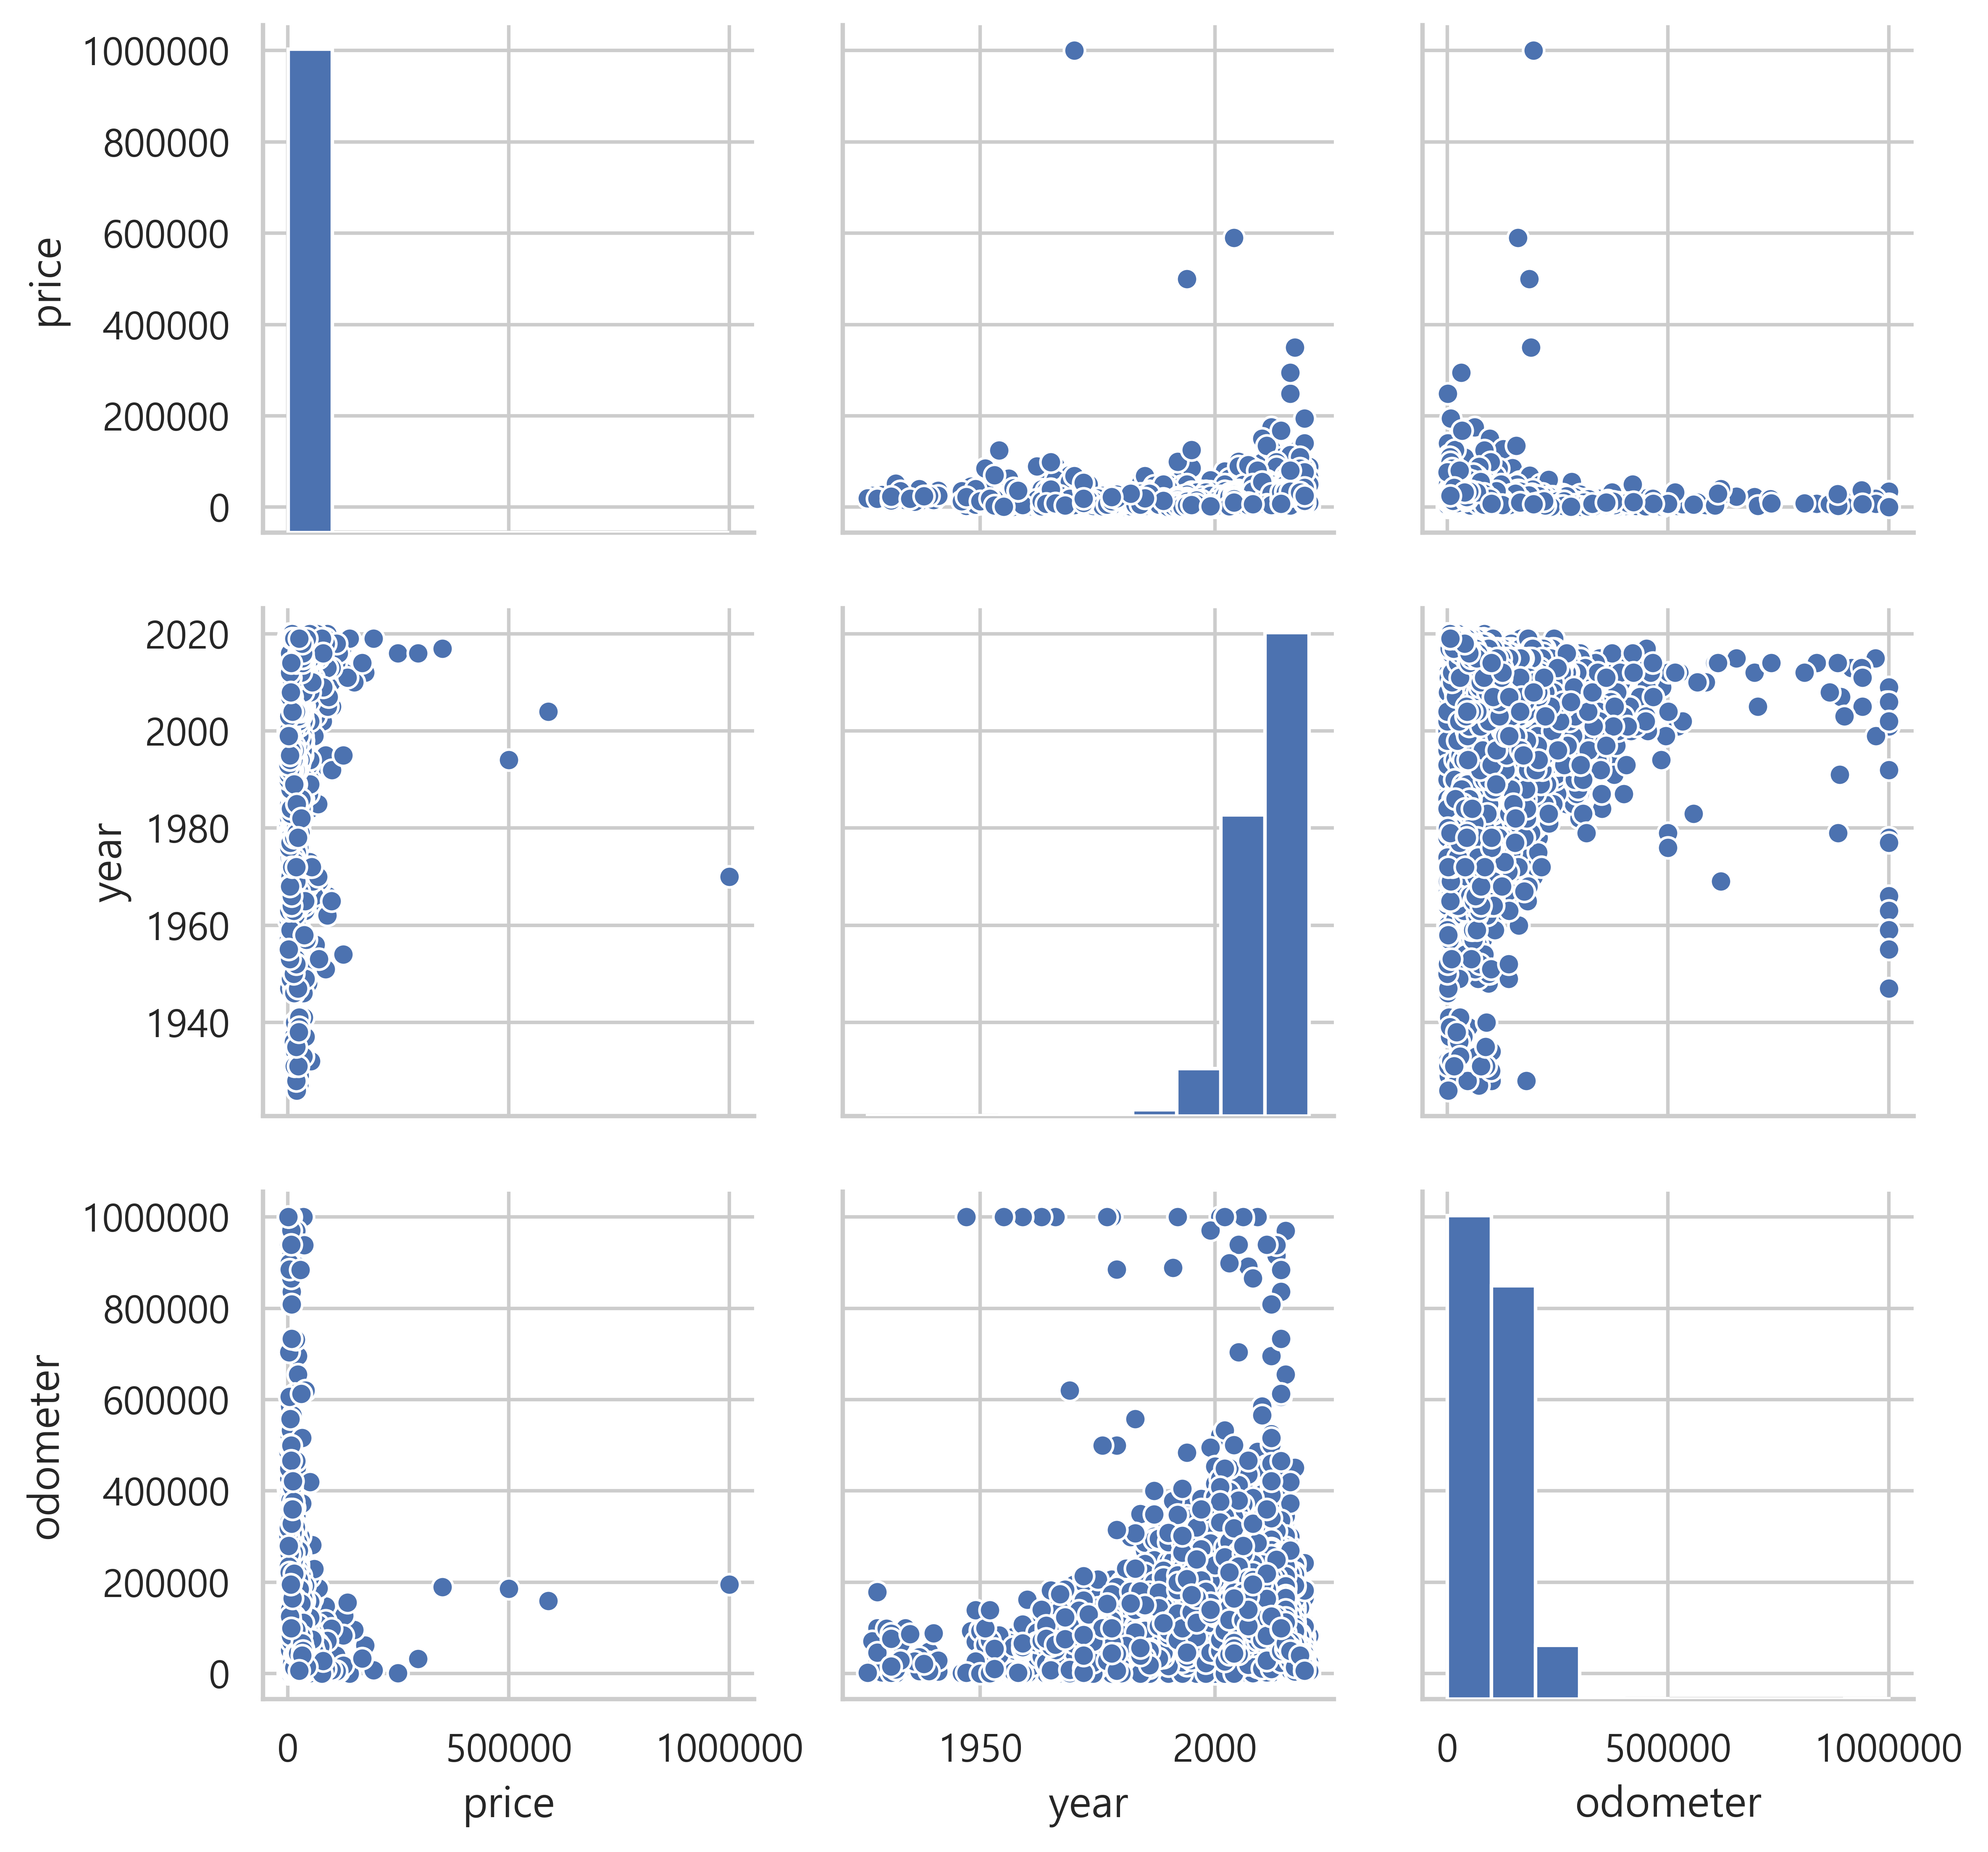

In [47]:
sns.pairplot(car_df[["price", "year", "odometer"]])
plt.show()

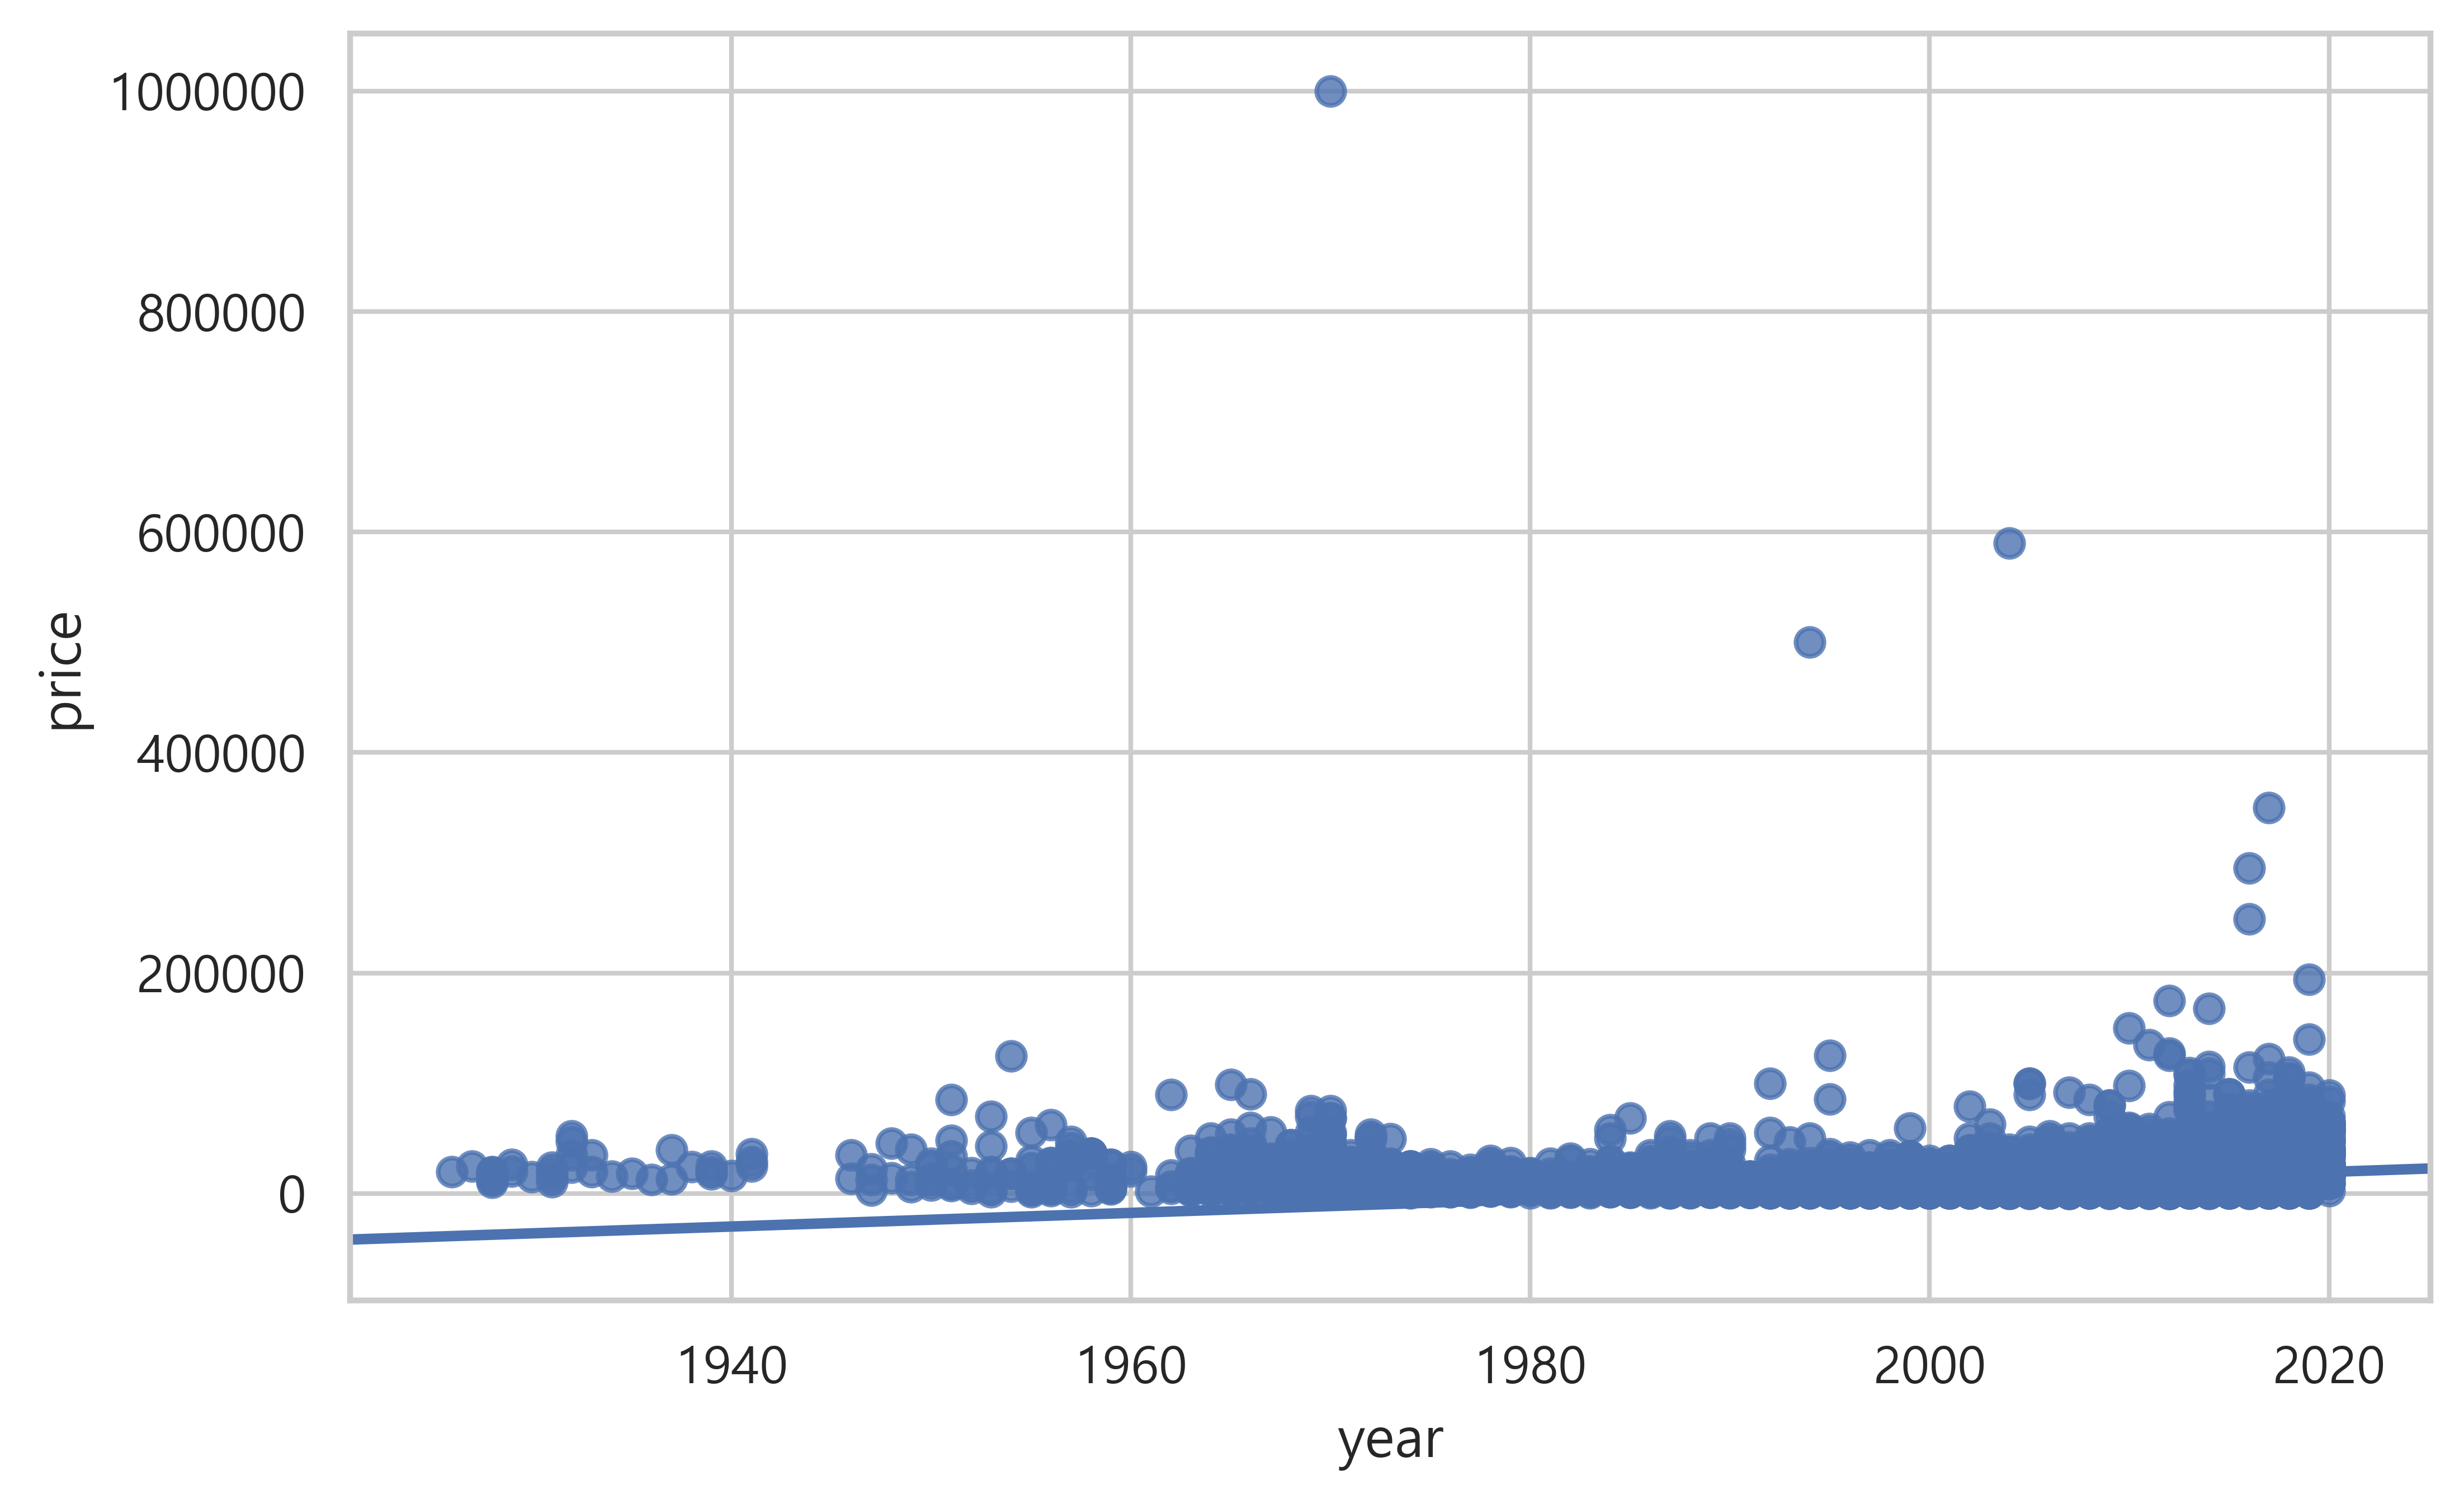

In [52]:
sns.regplot(x="year", y="price", data=car_df)
plt.show()

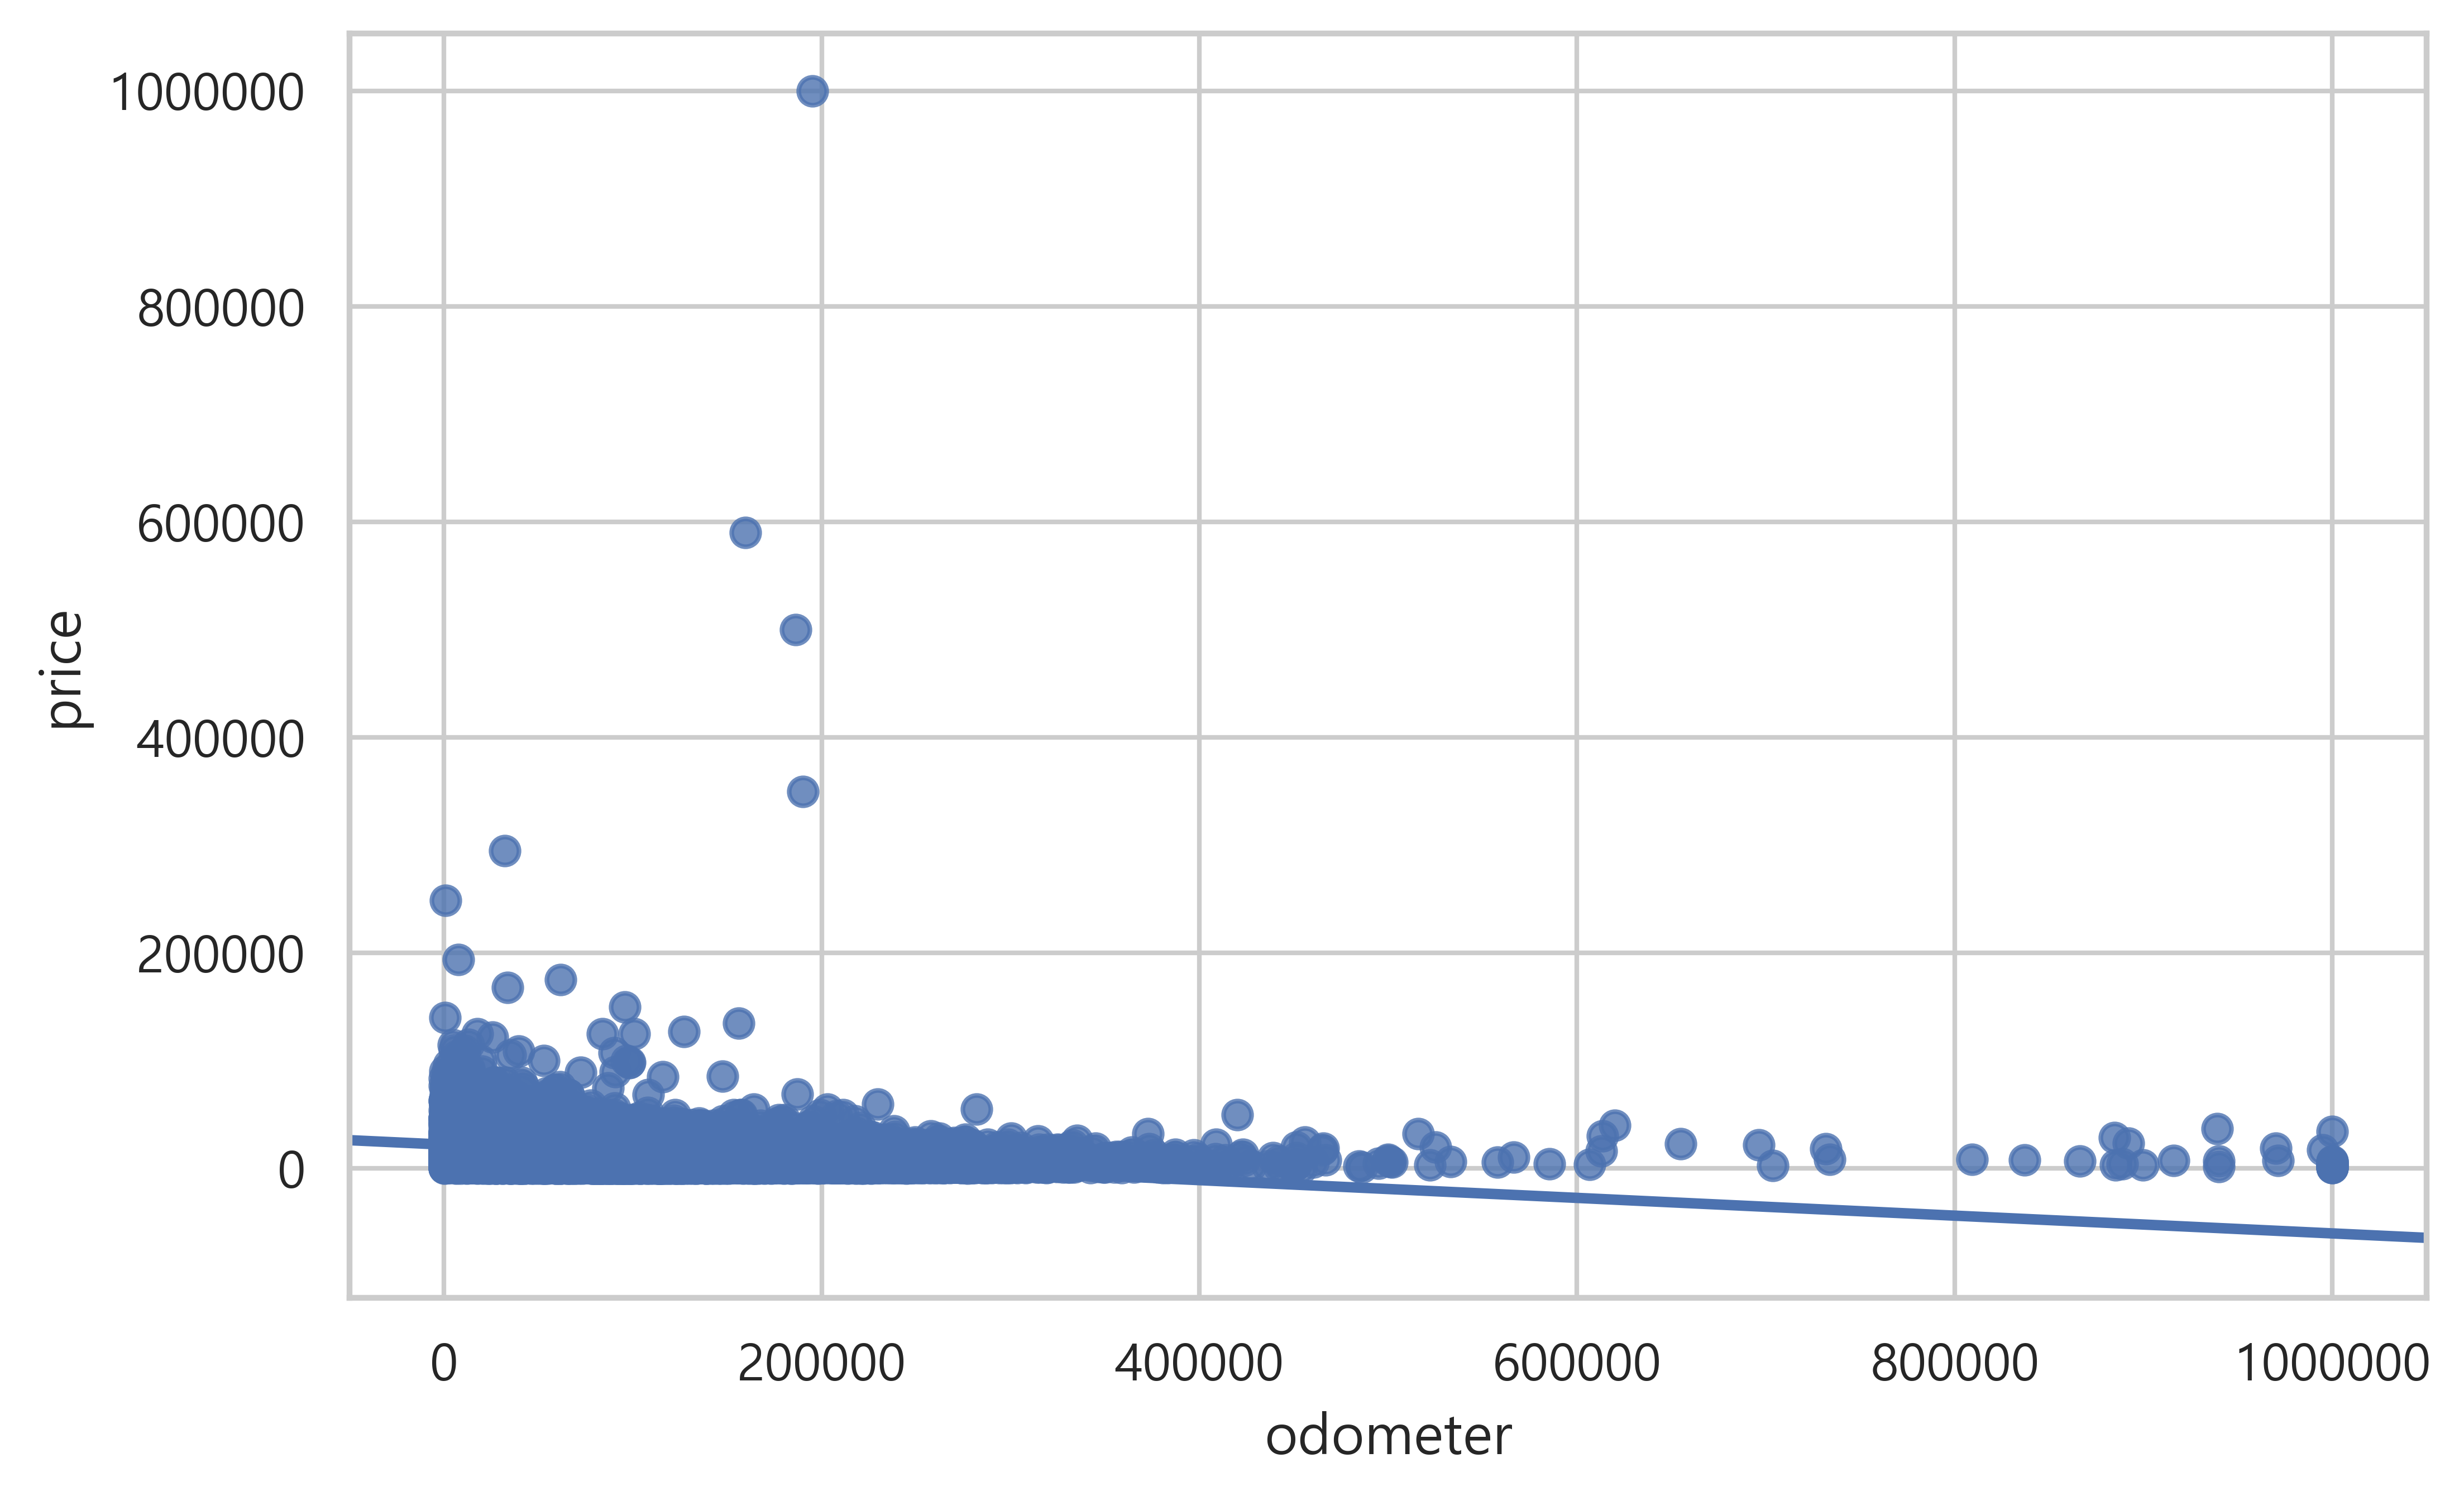

In [53]:
sns.regplot(x="odometer", y="price", data=car_df)
plt.show()

In [56]:
from patsy import dmatrix

In [59]:
car_df.columns

Index(['id', 'year', 'manufacturer', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'vin', 'drive', 'type', 'paint_color',
       'state', 'price'],
      dtype='object')

In [64]:
dm = dmatrix("C(cylinders) + 0", car_df)
dm

DesignMatrix with shape (71454, 8)
  Columns:
    ['C(cylinders)[10 cylinders]',
     'C(cylinders)[12 cylinders]',
     'C(cylinders)[3 cylinders]',
     'C(cylinders)[4 cylinders]',
     'C(cylinders)[5 cylinders]',
     'C(cylinders)[6 cylinders]',
     'C(cylinders)[8 cylinders]',
     'C(cylinders)[other]']
  Terms:
    'C(cylinders)' (columns 0:8)
  (to view full data, use np.asarray(this_obj))

In [68]:
dm2 = dmatrix("C(cylinders)", car_df)
dm2

DesignMatrix with shape (71454, 8)
  Columns:
    ['Intercept',
     'C(cylinders)[T.12 cylinders]',
     'C(cylinders)[T.3 cylinders]',
     'C(cylinders)[T.4 cylinders]',
     'C(cylinders)[T.5 cylinders]',
     'C(cylinders)[T.6 cylinders]',
     'C(cylinders)[T.8 cylinders]',
     'C(cylinders)[T.other]']
  Terms:
    'Intercept' (column 0), 'C(cylinders)' (columns 1:8)
  (to view full data, use np.asarray(this_obj))